<a href="https://colab.research.google.com/github/Cavalheiro93/mvp-data-analyst-global-ai-market/blob/main/Projeto_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global AI Job Market & Salary Trends 2025

AI Job Market Analysis Dataset 2025. Retrieved from Kaggle.com

## 💠Introdução e Definição do Problema

Com o grande avanço da Inteligência Artificial, o mercado de trabalho tem passado por transformações significativas em escala global. Novas funções, cargos e áreas de atuação vêm surgindo rapidamente, acompanhadas por uma crescente demanda por profissionais qualificados em diversas especialidades da IA.

Essa movimentação tem impulsionado contratações internacionais, promovendo a mobilidade de talentos e o trabalho remoto como tendência. Empresas de diferentes portes e regiões estão disputando profissionais capacitados, o que abre espaço para análises sobre desigualdade salarial, tendências de contratação e habilidades mais requisitadas.

Este projeto tem como objetivo analisar as principais tendências do mercado global de trabalho na área de IA — e, se possível, fazer um recorte do cenário brasileiro. Serão investigadas questões como:
- Quais áreas de atuação estão em maior crescimento?
- Quais regiões estão contratando em maior escala?
- Quais são as principais habilidades técnicas exigidas?
- Como estão distribuídos os salários globalmente?

Algumas premissas e hipóteses: 
- Países Europeus (principalmente Dinamarca, Suiça ou Suécia) terão os melhores Salários e Benefícios.
- Haverão mais vagas nos EUA do que nos demais países
- Possivelmente Python e SQL deverá ser a habilidade mais requisitada do mercado.

O Dataset está muito bem estrtuturado. Não foi identificado valores duplicados ou mesmo Campos Vazios.

Entretanto uma das restrições foi a ausência de dados referente ao Brasil. Possivelmente, para fins comparativos, teremos que buscar uma outra base de dados com dados similares, ou montar nossa propria base

A seguir então seguiremos com o nosso estudo, com o propósito de tentar responder todas essas questões com Análise de Dados e boas práticas.

O Dataset pode ser encontrado no link abaixo:

https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025

---


## 💠 Dicionário de Dados - AI Job Dataset

| Coluna                  | Descrição (PT-BR)                                                                 | Tipo     |
|------------------------|------------------------------------------------------------------------------------|----------|
| `job_id`               | Identificador único para cada vaga                                                | String   |
| `job_title`            | Título padronizado do cargo                                                       | String   |
| `salary_usd`           | Salário anual em dólares (USD)                                                    | Integer  |
| `salary_currency`      | Moeda original do salário                                                         | String   |
| `experience_level`     | Nível de experiência (EN = Júnior, MI = Pleno, SE = Sênior, EX = Executivo)       | String   |
| `employment_type`      | Tipo de contratação (FT = Tempo Integral, PT = Meio Período, CT = Contrato, FL = Freelancer) | String |
| `company_location`     | País onde está localizada a empresa                                               | String   |
| `company_size`         | Porte da empresa (S = Pequena <50, M = Média 50-250, L = Grande >250)             | String   |
| `employee_residence`   | País de residência do funcionário                                                 | String   |
| `remote_ratio`         | Nível de trabalho remoto (0 = Presencial, 50 = Híbrido, 100 = Remoto Total)       | Integer  |
| `required_skills`      | Top 5 habilidades exigidas (separadas por vírgula)                                | String   |
| `education_required`   | Nível mínimo de escolaridade exigido                                              | String   |
| `years_experience`     | Anos de experiência exigidos                                                      | Integer  |
| `industry`             | Setor de atuação da empresa                                                       | String   |
| `posting_date`         | Data em que a vaga foi publicada                                                  | Date     |
| `application_deadline`| Prazo final para candidatura                                                      | Date     |
| `job_description_length`| Quantidade de caracteres da descrição da vaga                                   | Integer  |
| `benefits_score`       | Pontuação numérica do pacote de benefícios (1 a 10)                               | Float    |
| `company_name`       | Nome da Empresa                               | String    |

## 🔷 Pré Análise de Dados

Nesta etapa, realizaremos uma análise exploratória para entender a estrutura e a qualidade do dataset. Vamos verificar:

- O formato e as dimensões da base
- Tipos de variáveis
- Presença de valores nulos ou discrepantes
- Estatísticas descritivas das variáveis numéricas

Essas informações serão essenciais para orientar os próximos passos do projeto.


### 🔹Importação das bibliotecas e Criação do Dataframe

In [66]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

file_path_github = "https://raw.githubusercontent.com/Cavalheiro93/mvp-data-analyst-global-ai-market/refs/heads/main/source/ai_job_dataset.csv"

df = pd.read_csv(file_path_github, sep=',', encoding='latin1')

### 🔹Leitura das 5 primeiras linhas

Visualizamos as 5 primeiras linhas para entender a estruturação do Dataset

In [67]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


### 🔹Análise dos Tipos de Dados

In [68]:
df.dtypes

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object

Usando a função `df.dtypes`, percebemos que as colunas `posting_date` e `application_deadline` não estavam no formato *date* conforme mencionado no Dicionário de Dados.

Faremos o tratamento manualmente a seguir

## 🔶Pré Tratamento dos Dados com POO

Abaixo, faremos um pré tratamento nos dados, apenas para adequar os dados.

Para isso, usaremos Orientação a Objetos.

Criamos o arquivo `limpeza_dados.py` hospedado no *Github*.

Nele Temos a Classe `LimpezaDados`, que possui o atributo *self.caminho_arquivo* necessário para rodar.

### 🔸Importando nossa Biblioteca criada para limpeza dos dados

In [69]:
# 1. Apaga o arquivo antigo local (se existir)
!rm TratamentoDeDados.py

# 2. Baixa a nova versão
!wget --no-cache https://raw.githubusercontent.com/Cavalheiro93/mvp-data-analyst-global-ai-market/refs/heads/main/TratamentoDeDados.py


'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


### 🔸 Limpeza dos dados
Com a Classe `LimpezaDados` criada, chamamos a função `executar_pipeline` para executar todas as etapas da limpeza do Dataframe
- Carrega os dados
- Remove valores nulos, se houver
- Remove duplicatas se houver
- Converte os campos `posting_date` e `application_deadline` para formato *datetime64*
- Transforma os campos `remote_ratio`, `experience_level`, `employment_type` e `company_size` para o formato *category*

In [70]:
# 3. Recarrega o módulo no ambiente Python
import importlib
import TratamentoDeDados
importlib.reload(TratamentoDeDados)
from TratamentoDeDados import LimpezaInicialDados

df = LimpezaInicialDados(df).executar()

📥 Iniciando limpeza inicial...
🔹 Valores nulos tratados
🔹 Duplicatas removidas
🔹 Datas convertidas para datetime
🔹 Coluna 'Start_Month' criada
🔹 Coluna 'remote_ratio' categorizado
🔹 Coluna 'experience_level' categorizado
🔹 Coluna 'employment_type' categorizado
🔹 Coluna 'company_size' categorizado
✅ Fim da limpeza inicial. DataFrame disponível.


### 🔸 Exibição do formato das Colunas

In [71]:
df[['posting_date', 'application_deadline', 'Start_Month','remote_ratio', 'experience_level', 'employment_type', 'company_size']].dtypes

posting_date            datetime64[ns]
application_deadline    datetime64[ns]
Start_Month                     object
remote_ratio                  category
experience_level              category
employment_type               category
company_size                  category
dtype: object

### 🔸 Reexibição do Dataframe agora Tratado

In [72]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,Start_Month
0,AI00001,AI Research Scientist,90376,USD,3-Senior,Contract,China,2-Medium [50-250],China,2-Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024-10
1,AI00002,AI Software Engineer,61895,USD,1-Entry-level,Contract,Canada,2-Medium [50-250],Ireland,3-Remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,2024-11
2,AI00003,AI Specialist,152626,USD,2-Mid-level,Freelance,Switzerland,3-Large [>250],South Korea,1-On-site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,2025-03
3,AI00004,NLP Engineer,80215,USD,3-Senior,Freelance,India,2-Medium [50-250],India,2-Hybrid,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,2024-12
4,AI00005,AI Consultant,54624,EUR,1-Entry-level,Part-time,France,1-Small [<50],Singapore,3-Remote,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,2025-04


---

## 🔷 Análise descritiva dos dados

A seguir, usaremos a função `df.describe` para exibir informações descritivas de cada uma das colunas, sendo elas:
- Contagem de registros
- Valores Únicos
- Média
- Desvio padrão
- Quartal
- Minimo e Máximo
- Valor mais frequente e contagem da frequência

### 🔹 Descritiva das colunas tipo Texto

In [73]:
# Seleciona apenas as colunas do tipo string (object)
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
job_id,15000,15000,AI00001,1
job_title,15000,20,Machine Learning Researcher,808
salary_currency,15000,3,USD,11957
company_location,15000,20,Germany,814
employee_residence,15000,20,Sweden,790
required_skills,15000,13663,"Python, TensorFlow, PyTorch",17
education_required,15000,4,Bachelor,3789
industry,15000,15,Retail,1063
company_name,15000,16,TechCorp Inc,980
Start_Month,15000,16,2024-04,985


Resumo:
- Não temos registros vazios para as colunas de tipo Texto
- Como esperávamos, não demos `job_id` repetidos, garantindo que ele é uma chave primária
- A área mais requisitada é a ***Machine Learning Researcher*** aparecendo no dataset ***808 vezes***
- Embora apareça ***17 vezes no campo `required_skills`***, o resultado de ***Python, TensorFlow, PyTorch*** não diz muito se essas são as principais habilidades requisitadas, por conta das multiplas variaveis possíveis (13663). Para ter uma análise mais cuidadosa, precisaremos ver esse campo de uma outra forma

### 🔹 Descritiva das colunas tipo Número Inteiro

In [74]:
# Seleciona apenas as colunas do tipo inteiro (int)
df.select_dtypes(include='int').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary_usd,15000.0,115348.965133,60260.940438,32519.0,70179.75,99705.0,146408.5,399095.0
years_experience,15000.0,6.253200,5.545768,0.0,2.00,5.0,10.0,19.0
job_description_length,15000.0,1503.314733,576.127083,500.0,1003.75,1512.0,2000.0,2499.0


Resumo:
- Não temos registros vazios para as colunas de tipo Inteiro
- O Salário anual varia entre 32k e 399k, com uma média aproximadamente de 115k.
- O desvio padrão de 60k indica que há uma **alta dispersão** salarial entre as vagas disponíveis
- A exigência para a maior parte das vagas está em 5 anos de experiência, porém ainda há vagas que não requerem experiência prévia (years_experience = 0)

### 🔹 Descritiva das colunas tipo Número Decimal

In [75]:
# Seleciona apenas as colunas do tipo decimais (float)
df.select_dtypes(include='float').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
benefits_score,15000.0,7.504273,1.45087,5.0,6.2,7.5,8.8,10.0


Resumo:
- Não temos registros vazios para as colunas de tipo Decimais
- Grande parte dos beneficios estão com o score de 7.5
- O desvio padrão de 1.45 mostra que a maioria das avaliações está relativamente próxima da média

### 🔹 Descritiva das colunas tipo Data

In [76]:
# Seleciona apenas as colunas do tipo data (datetime64)
df.select_dtypes(include='datetime64').describe().transpose()

,count,mean,min,25%,50%,75%,max
posting_date,15000,2024-08-29 08:48:51.840000,2024-01-01 00:00:00,2024-04-29 00:00:00,2024-08-28 00:00:00,2024-12-29 00:00:00,2025-04-30 00:00:00
application_deadline,15000,2024-10-11 21:55:23.520000,2024-01-16 00:00:00,2024-06-13 00:00:00,2024-10-12 00:00:00,2025-02-10 00:00:00,2025-07-11 00:00:00


Resumo
- Não temos registros vazios para as colunas de tipo Decimais
- A data em que as vagas foram postadas vão de 01/01/2024 até 30/04/2025

### 🔹 Descritiva das colunas tipo Categoria

In [77]:
# Seleciona apenas as colunas do tipo Categoria (category)
df.select_dtypes(include='category').describe().transpose()

,count,unique,top,freq
experience_level,15000,4,2-Mid-level,3781
employment_type,15000,4,Full-time,3812
company_size,15000,3,1-Small [<50],5007
remote_ratio,15000,3,1-On-site,5075


Resumo
- Não temos registros vazios para as colunas de tipo Decimais
- Embora a maior parte das vagas sejam presenciais (On-site), ainda temos maior parte delas sendo remota ou híbrida

## 🔷 Análise Exploratória dos Dados
Nessa etapa faremos uma análise mais detalhada dos dados. A ideia é aprofundar no dataset para tirar insights valiosos, e também definir o que usaremos e o que não usaremos de informação

### 🔹 Mapa de Calor (Heatmap)
A seguir, usaremos o mapa de calor (ou heatmap) para identificar as correlações entre as variáveis do tipo numéricas

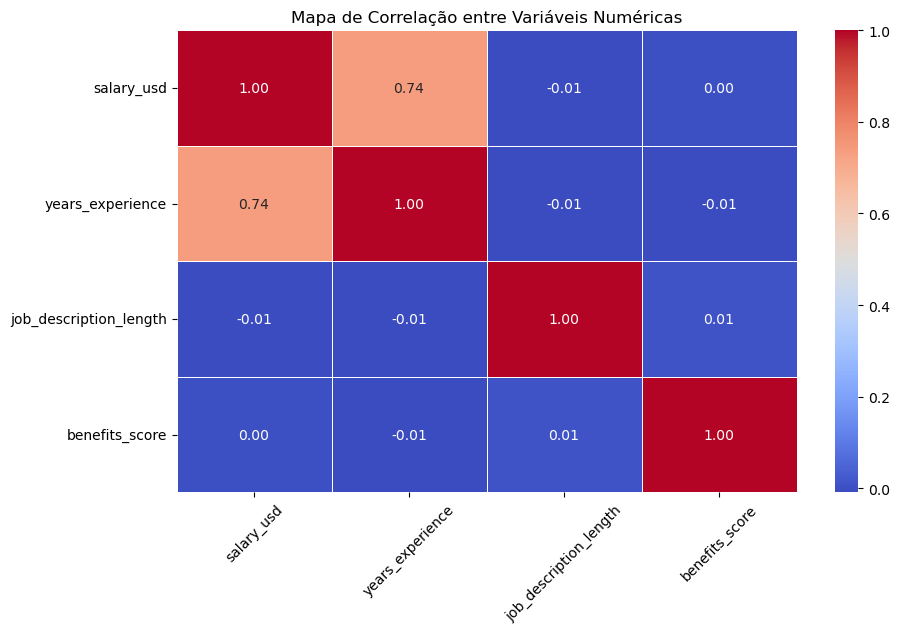

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona apenas colunas numéricas
df_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação
matriz_corr = df_numericas.corr()

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Cria o heatmap com anotações
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Resumo:
- Percebemos uma forte correlação entre Salário e Anos de Experiência, algo que já cogitávamos que fosse acontecer.
- Entretanto, os benefícios não acompanham essa mesma correlação, por exemplo, Salários altos não quer dizer que os benefícios também serão melhores

### 🔹 Gráfico de Dispersão (scatterplot)
Já que identificamos a correlação entre Salário e Anos de experiência, vamos usar o gráfico de dispersão (ou scatterplot), para entender melhor essa distribuição

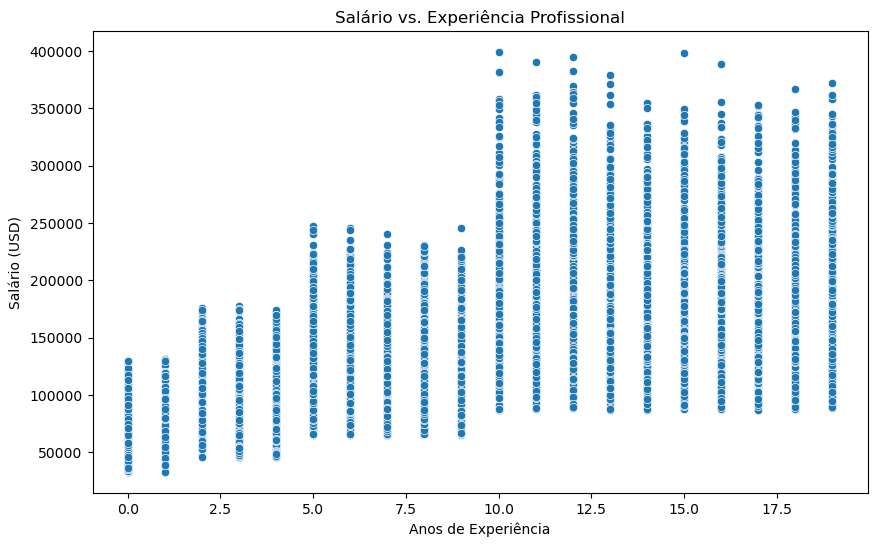

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='years_experience', y='salary_usd')
plt.title('Salário vs. Experiência Profissional')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário (USD)')
plt.show()

Resumo:
- Analisando os dados bem por cima (sem entrar no detalhe de área de atuação), percebmos que antes dos 10 anos de experiência, os salários não passavam dos 250k de dólares anuais.
- Somente a partir dos 10 anos que vemos os salários saltarem, chegando até os 400k anuais de dolares(embora seja um outlier)

### 🔹 Gráfico de Caixa (boxplot)
Já que identificamos a correlação entre Salário e Anos de experiência, vamos usar o gráfico de dispersão (ou scatterplot), para entender melhor essa distribuição

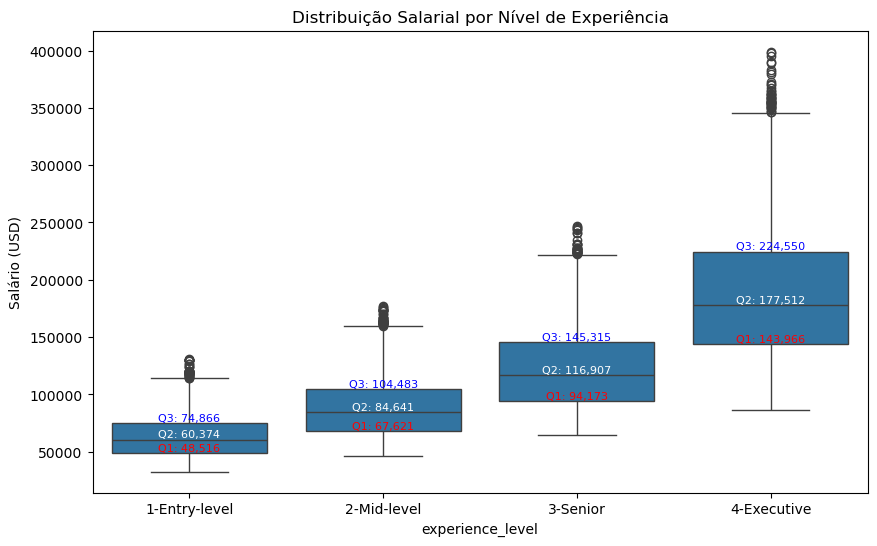

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='experience_level', y='salary_usd')

# Quartis por categoria
quartis = df.groupby('experience_level')['salary_usd'].quantile([0.25, 0.5, 0.75]).unstack()

# Adiciona as anotações no gráfico
for i, (cat, row) in enumerate(quartis.iterrows()):
    ax.text(i, row[0.25], f"Q1: {row[0.25]:,.0f}", color='red', ha='center', va='bottom', fontsize=8)
    ax.text(i, row[0.5], f"Q2: {row[0.5]:,.0f}", color='white', ha='center', va='bottom', fontsize=8)
    ax.text(i, row[0.75], f"Q3: {row[0.75]:,.0f}", color='blue', ha='center', va='bottom', fontsize=8)

plt.title("Distribuição Salarial por Nível de Experiência")
plt.ylabel("Salário (USD)")
plt.show()


Resumo:
- Analisando o boxplot, percebe-se que nos níveis mais baixos de experiência, os salários são mais concentrados. No caso do Entry-level, por exemplo, a maioria dos salários anuais está entre aproximadamente 50.000 e 75.000 USD. Existem algumas exceções que chegam perto de 100.000 USD, mas valores acima disso são considerados outliers.

- À medida que o nível de experiência aumenta, observamos uma expansão significativa do IQR, indicando maior variabilidade salarial. Esse padrão mostra que os salários ficam menos previsíveis e mais dependentes de fatores individuais como área de atuação, localização, e competências.

- Percebe-se uma leve assimetria positiva na distribuição salarial, com a mediana mais próxima do primeiro quartil (Q1) do que do terceiro (Q3), indicando que os salários estão mais concentrados nas faixas inferiores, enquanto os valores mais altos são mais dispersos e geram outliers acima da média

- No nível Executive, a variabilidade é claramente a maior de todas. A maior parte dos salários está entre 145.000 e 225.000 USD por ano, com uma mediana de aproximadamente 177.000 USD. Os bigodes superiores são mais longos, indicando que, mesmo sem considerar os outliers, os valores já se estendem bastante. Além disso, há uma concentração alta de outliers, com salários extrapolando os 225.000 USD e chegando próximo dos 400.000 USD anuais.

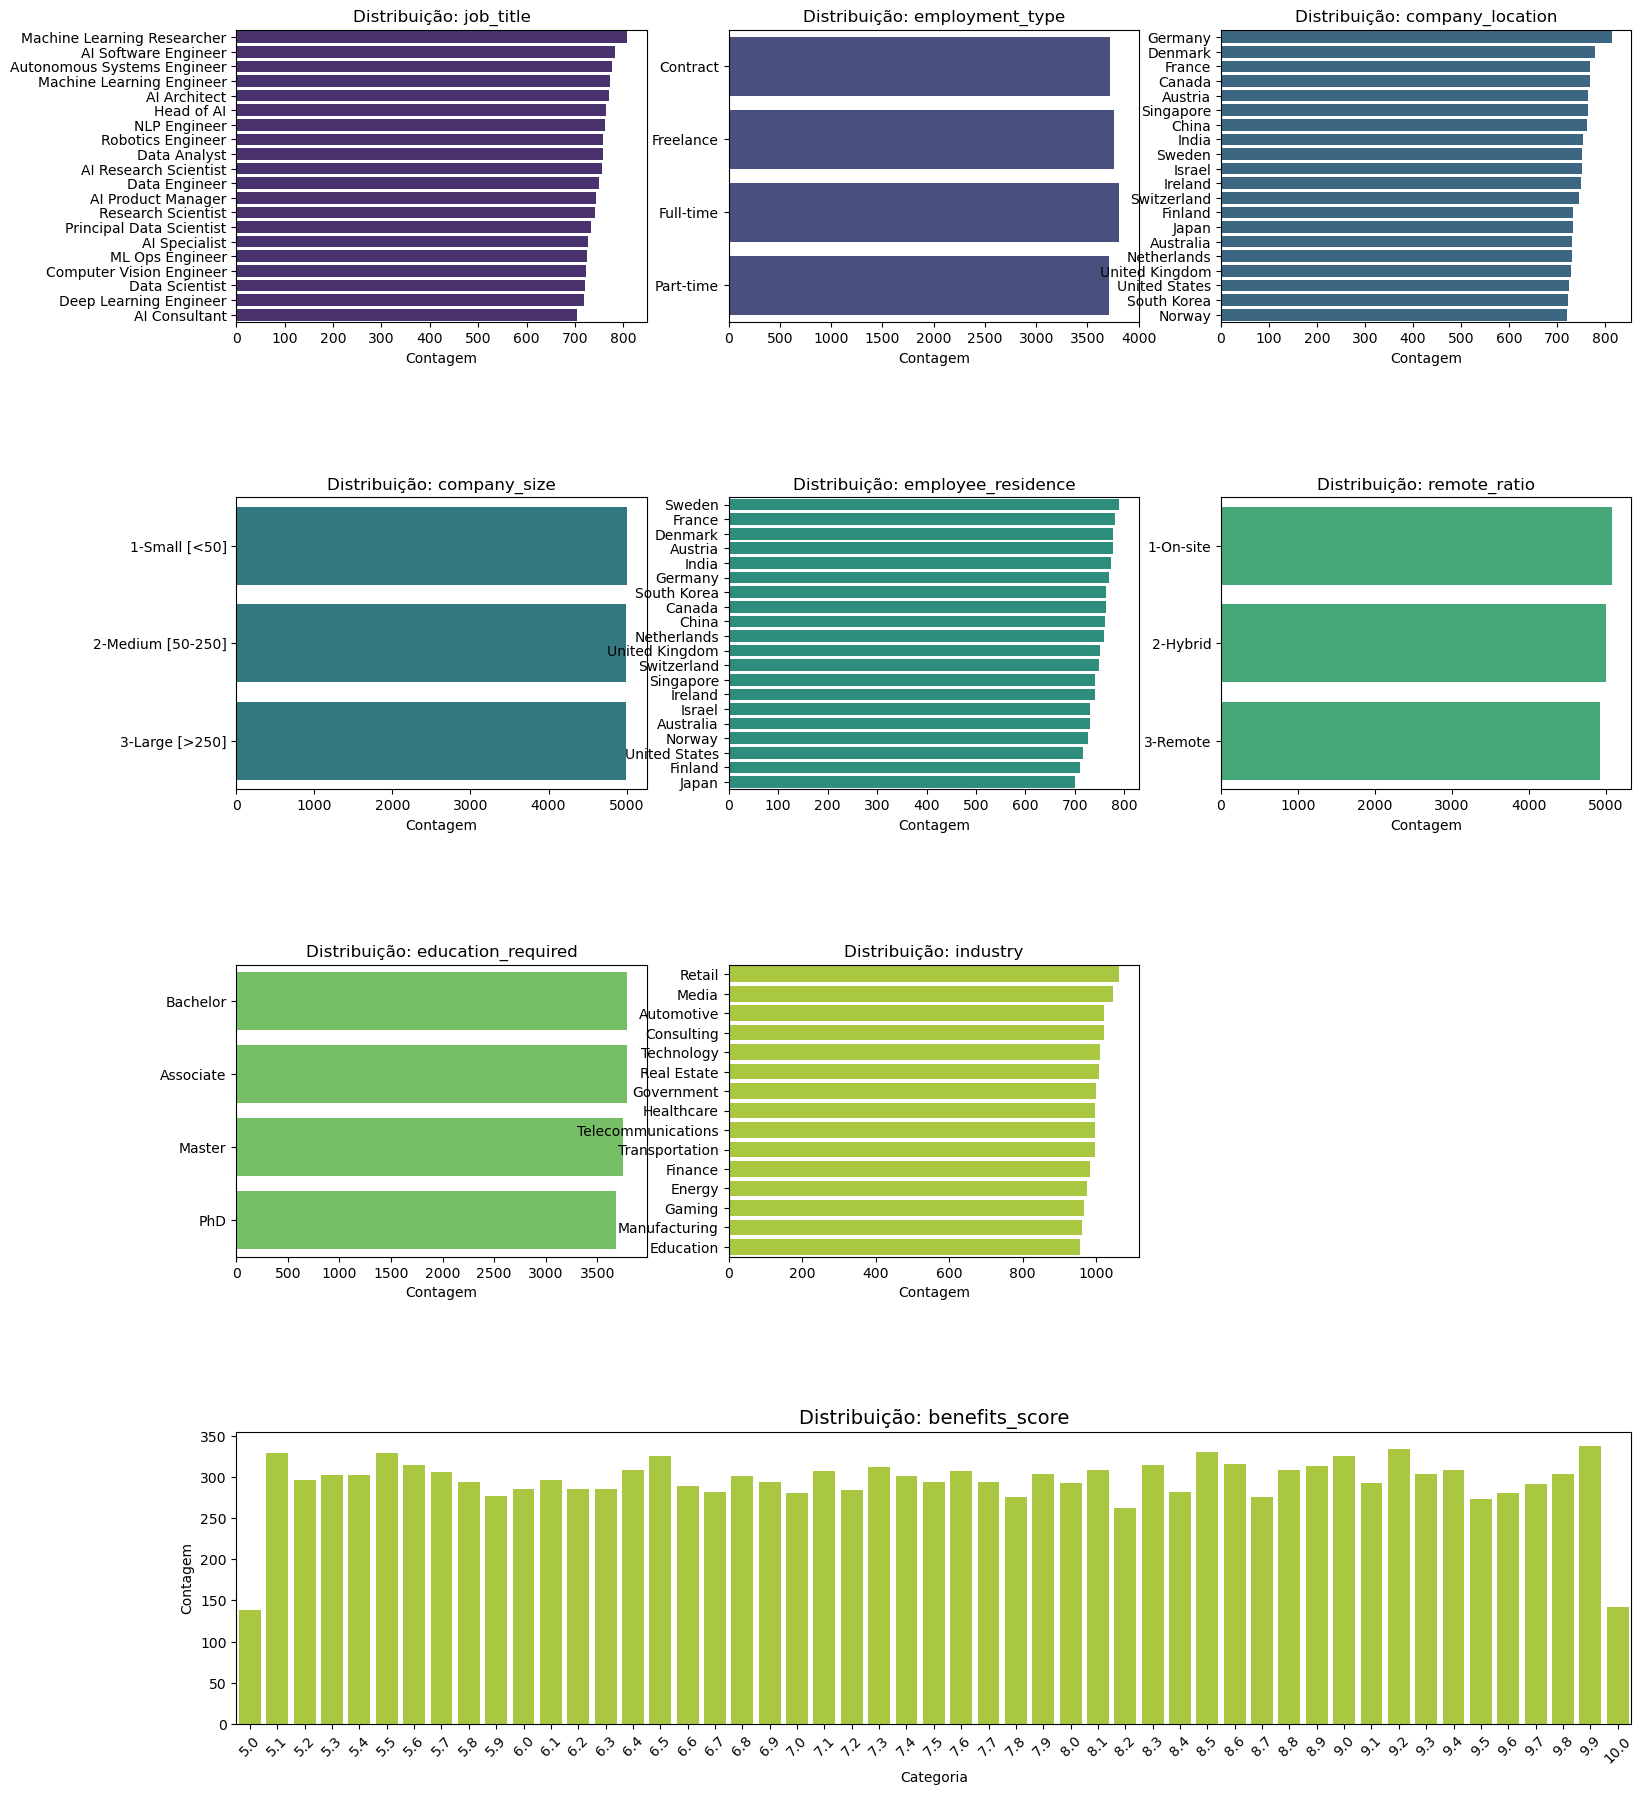

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from seaborn import color_palette


# Lista de colunas categóricas (benefits_score será tratado separado)
categorias = ['job_title', 'employment_type', 'company_location', 
              'company_size', 'employee_residence', 
              'remote_ratio', 'education_required', 'industry']

viridis = color_palette("viridis", len(categorias))

# Configura a grade: 4 linhas (a última será só para benefits_score), 3 colunas
fig = plt.figure(figsize=(18, 22))
gs = gridspec.GridSpec(4, 3, figure=fig)
gs.update(hspace=0.6)  # Espaçamento vertical

# Loop para os primeiros 8 gráficos (3x3 menos o último espaço)
for i, coluna in enumerate(categorias):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    contagem = df[coluna].value_counts()
    sns.barplot(x=contagem.values, y=contagem.index, color=viridis[i], ax=ax)
    ax.set_title(f'Distribuição: {coluna}', fontsize=12)
    ax.set_xlabel('Contagem')
    ax.set_ylabel('')

# Gráfico do benefits_score ocupando a linha inteira (linha 3, colunas 0 até 2)
ax_big = fig.add_subplot(gs[3, :])  # Usa a linha inteira
contagem_benefits = df['benefits_score'].value_counts()
sns.barplot(x=contagem_benefits.index, y=contagem_benefits.values, color=viridis[i], ax=ax_big)
ax_big.set_title('Distribuição: benefits_score', fontsize=14)
ax_big.set_xlabel('Categoria')
ax_big.set_ylabel('Contagem')
ax_big.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Resumo
- Após a visualização consolidada de todos os gráficos de barras, a primeira impressão é de que os dados estão bem distribuídos entre as categorias.
- Observamos uma boa variação entre os valores, sem a presença de categorias que dominam esmagadoramente os registros (ex: nenhuma com mais de 90% de ocorrência).

- Isso nos dá segurança para análises comparativas futuras, já que as categorias têm representatividade suficiente e não sofrem com viés por baixa amostragem.

- A única exceção foi a variável `benefits_score`, que apresentou um leve padrão de concentração nas pontas:

    - Algumas empresas atribuíram nota mínima (5.0), enquanto outras marcaram nota máxima (10.0).

    - Mesmo assim, a distribuição geral dos scores está relativamente próxima e equilibrada, sem grandes distorções.

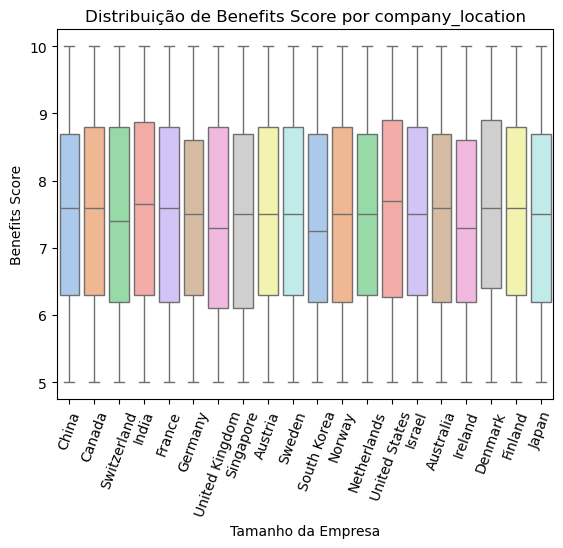

In [82]:
sns.boxplot(x='company_location', y='benefits_score', data=df, palette='pastel')
plt.title('Distribuição de Benefits Score por company_location')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Benefits Score')
plt.tick_params(axis='x', rotation=70)
plt.show()

Resumo: 
- Olhando por cima os benefícios oferecios por Localidade das empresas, nenhuma se destaca fortemente em relação as outras.
- Há alguns outliers nas pontas (5.0 e 10.0), mas o padrão central gira entre 7 e 8.
- Aparentemente, o país da empresa não é um fator determinante isolado para o nível de benefícios.

---

## 🔶Tratamento final dos Dados
Nesse momento já temos uma certa noção do que iremos explorar nesse dataset. Podemos agora focar em fazer um "pente fino" nos dados, para deixá-lo pronto para análise final

### 🔸 Definição das Colunas do Dataset
Faremos a exclusão de algumas colunas desse dataset, para mantê-lo mais limpo.
Quais colunas serão excluídas:
- `job_id` → Coluna apenas de id, não há necessidade de mantê-la
- `salary_currency` → A coluna `salary_usd` já nos informa o salário convertido em Dolar anuais
- `application_deadline` → Esse prazo não traz nenhuma informação relevante.
- `job_description_length` → Essa coluna também não traz nenhuma informação que precisaremos
- `company_name` → Não precisaremos dos nomes para as análises tambem

Para essa limpeza, também criamos uma Classe para limpar as colunas. Embora o proprio Pandas já tenha essa função, a ideia aqui foi criar essa Classe se eventualmente tivermos mais funções de Tratamento aqui, e torná-la de maneira escalável

In [83]:
from TratamentoDeDados import LimpezaFinalDados

colunas_remover = ['job_id', 'salary_currency', 'application_deadline', 'job_description_length', 'company_name']

df = LimpezaFinalDados(df, colunas_remover=colunas_remover).executar()

📥 Iniciando limpeza final...
🔹 Colunas removidas: job_id, salary_currency, application_deadline, job_description_length, company_name
✅ Fim da limpeza final. DataFrame disponível.


### 🔸 Exibindo os 5 primeiros registros, para confirmar a remoção das colunas

In [84]:
df.head(5)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,benefits_score,Start_Month
0,AI Research Scientist,90376,3-Senior,Contract,China,2-Medium [50-250],China,2-Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,5.9,2024-10
1,AI Software Engineer,61895,1-Entry-level,Contract,Canada,2-Medium [50-250],Ireland,3-Remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,5.2,2024-11
2,AI Specialist,152626,2-Mid-level,Freelance,Switzerland,3-Large [>250],South Korea,1-On-site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,9.4,2025-03
3,NLP Engineer,80215,3-Senior,Freelance,India,2-Medium [50-250],India,2-Hybrid,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,8.6,2024-12
4,AI Consultant,54624,1-Entry-level,Part-time,France,1-Small [<50],Singapore,3-Remote,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,6.6,2025-04


### 🔸 Criação do Dataframe para required_skills e plotagem de gráfico
Olhando para os registros da coluna `required_skills`, percebemos que era mencionada mais de uma skill separada por `,`. (ex:Tableau, PyTorch, Kubernetes, Linux, NLP)

Com os dados estruturado dessa maneira, não conseguiriamos obter bons insights, e portanto a saída para esse caso foi construir um Dataframe unificando esses dados.

Com o intuito de aplicar boas práticas de programação, construimos uma Classe que faria esse trabalho e que precisariamos apenas importar o arquivo e sua respectiva classe.

O `GeradorSkillsPorCategoria` precisa de 2 atributos:
- `df` → Dataframe do nosso estudo
- `job_title` → A coluna que será referência para avaliarmos os dados, que no exemplo seguido ***Quais as principais habilidades por Área de Atuação***

Essa função permite visualizarmos qualquer coluna do Dataframe, apenas trocando o nome da coluna

In [85]:
from TratamentoDeDados import GeradorSkillsPorCategoria

df_skills_job_title = GeradorSkillsPorCategoria(df, 'job_title')
df_skills_job_title.gerar()
df_skills_job_title.plotar_top_habilidades_interativo(top_n=5)

✅ DataFrame de skills por 'job_title' gerado com sucesso.


interactive(children=(Dropdown(description='job_title:', layout=Layout(width='50%'), options=('AI Architect', …

## 🎯 Insights obtidos do Dataset e Conclusões
Agora que exploramos bem o nosso Conjunto de Dados, vamos tentar obter insights valiosos e tirar as conclusões dos problemas inicialmente definidos

### 0️⃣1️⃣ Quais áreas de atuação estão em maior crescimento?

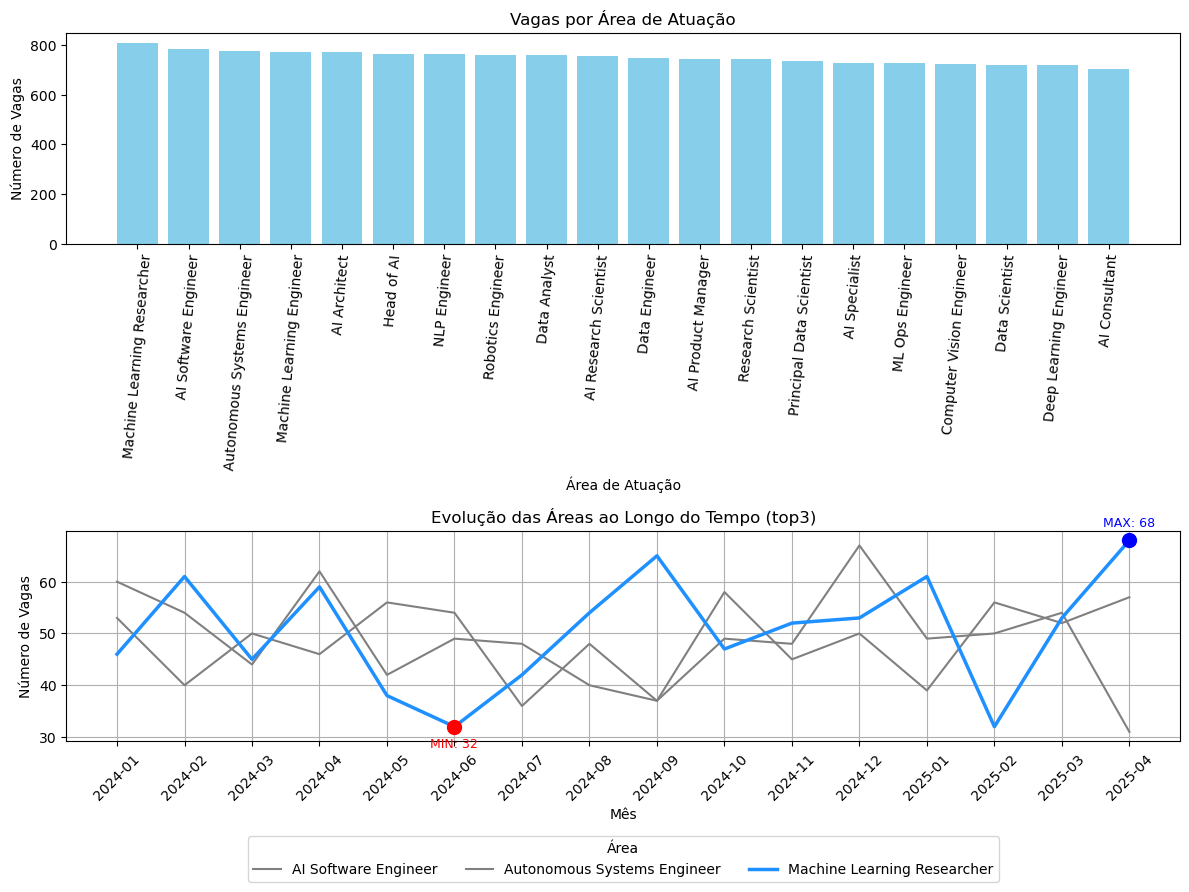

✅ DataFrame de skills por 'job_title' gerado com sucesso.


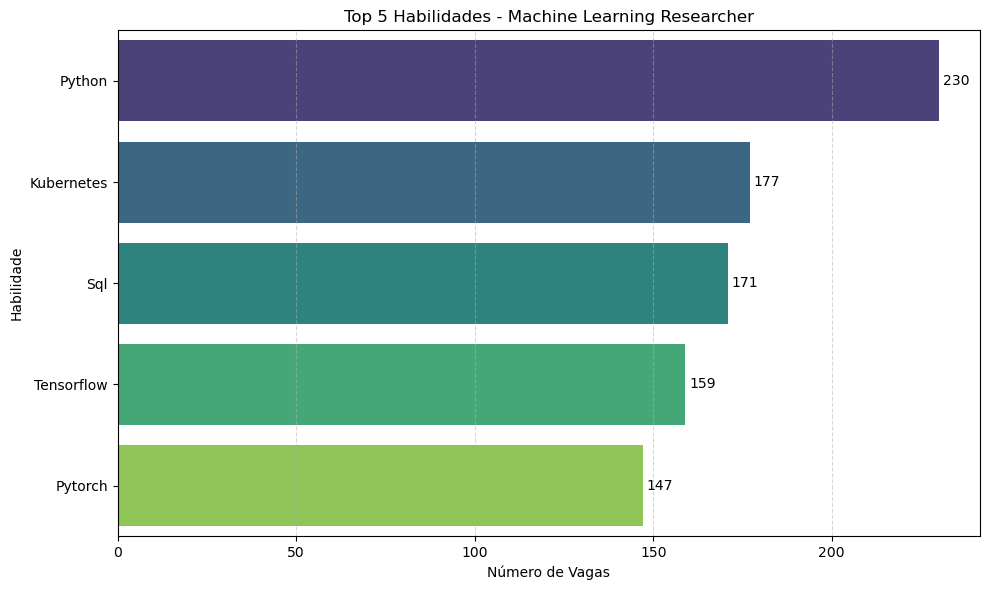

In [86]:
import matplotlib.pyplot as plt

# Criar figura com 2 subplots em coluna
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# ================================
# Gráfico 1: Barras totais
# ================================
df_agrupado = df['job_title'].value_counts()
axs[0].bar(df_agrupado.index, df_agrupado.values, color='skyblue')
axs[0].set_title('Vagas por Área de Atuação')
axs[0].set_xlabel('Área de Atuação')
axs[0].set_ylabel('Número de Vagas')
axs[0].tick_params(axis='x', rotation=85)

# ================================
# Gráfico 2: Linhas no tempo
# ================================
top_5_areas = df['job_title'].value_counts().nlargest(3).index
df_top = df[df['job_title'].isin(top_5_areas)]

df_linhas = (
    df_top
    .groupby(['Start_Month', 'job_title'])
    .size()
    .unstack(fill_value=0)
)

total_por_area = df_linhas.sum()
area_destaque = total_por_area.idxmax()

# Pegando a série da linha azul
serie_destaque = df_linhas[area_destaque]
x = df_linhas.index

# Encontrando pico e vale
pico_idx = serie_destaque.idxmax()
vale_idx = serie_destaque.idxmin()
pico_val = serie_destaque.max()
vale_val = serie_destaque.min()

# Plotando as linhas
for area in df_linhas.columns:
    if area == area_destaque:
        axs[1].plot(x, serie_destaque, label=area, color='dodgerblue', linewidth=2.5)
    else:
        axs[1].plot(x, df_linhas[area], label=area, color='gray', linewidth=1.5)

# Destaques no gráfico
axs[1].scatter(pico_idx, pico_val, color='blue', s=100, zorder=5)
axs[1].annotate(f'MAX: {pico_val}', (pico_idx, pico_val),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')

axs[1].scatter(vale_idx, vale_val, color='red', s=100, zorder=5)
axs[1].annotate(f'MIN: {vale_val}', (vale_idx, vale_val),
                textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')

axs[1].set_title('Evolução das Áreas ao Longo do Tempo (top3)')
axs[1].set_xlabel('Mês')
axs[1].set_ylabel('Número de Vagas')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)
axs[1].legend(title='Área', loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=3)

# Layout final
plt.tight_layout()
plt.show()

df_skills_job_title = GeradorSkillsPorCategoria(df, 'job_title')
df_skills_job_title.gerar()
df_skills_job_title.plotar_top_habilidades_interativo(top_n=5, categoria_especifica="Machine Learning Researcher")


**Conclusão**
As ***top 3 áreas com maior crescimento desde Janeiro de 2024*** são:
1. Machine Learning Researcher
2. IA Software Engineer
3. Autonomous Systems Engineer

Surpreendentemente as áreas de de ***Data Analyst, Data Engineer e Data Scientist não apresentaram grande crescimento como esperado***, dando espaço a muitas áreas relacionadas a IA (IA Software Engineer, IA Architect, Head of IA, etc...)

Olhando para a evolução ao longo do tempo, a área de ***Machine Learning Resercher apresentou sua menor queda em número de vagas em Junho/2024, com 32 vagas no mês***, mas que logo voltou a crescer contínuamente.

Recentemente, ***em Abril/2025 apresentou seu maior pico em número de vagas, com um total de 68 vagas no mês***.

Sendo assim, a vaga de "Machine Learning Researcher" tem um grande potêncial de Crescimento. Para aqueles que tem interesse de atuar, as principais habilidades requeridas apontadas pelo Dataset são:
- Python
- Kubernetes
- SQL
- Tensorflow
- Pytorch

### 0️⃣2️⃣ Quais regiões estão contratando em maior escala? E como estão distribuídos os salários globalmente?

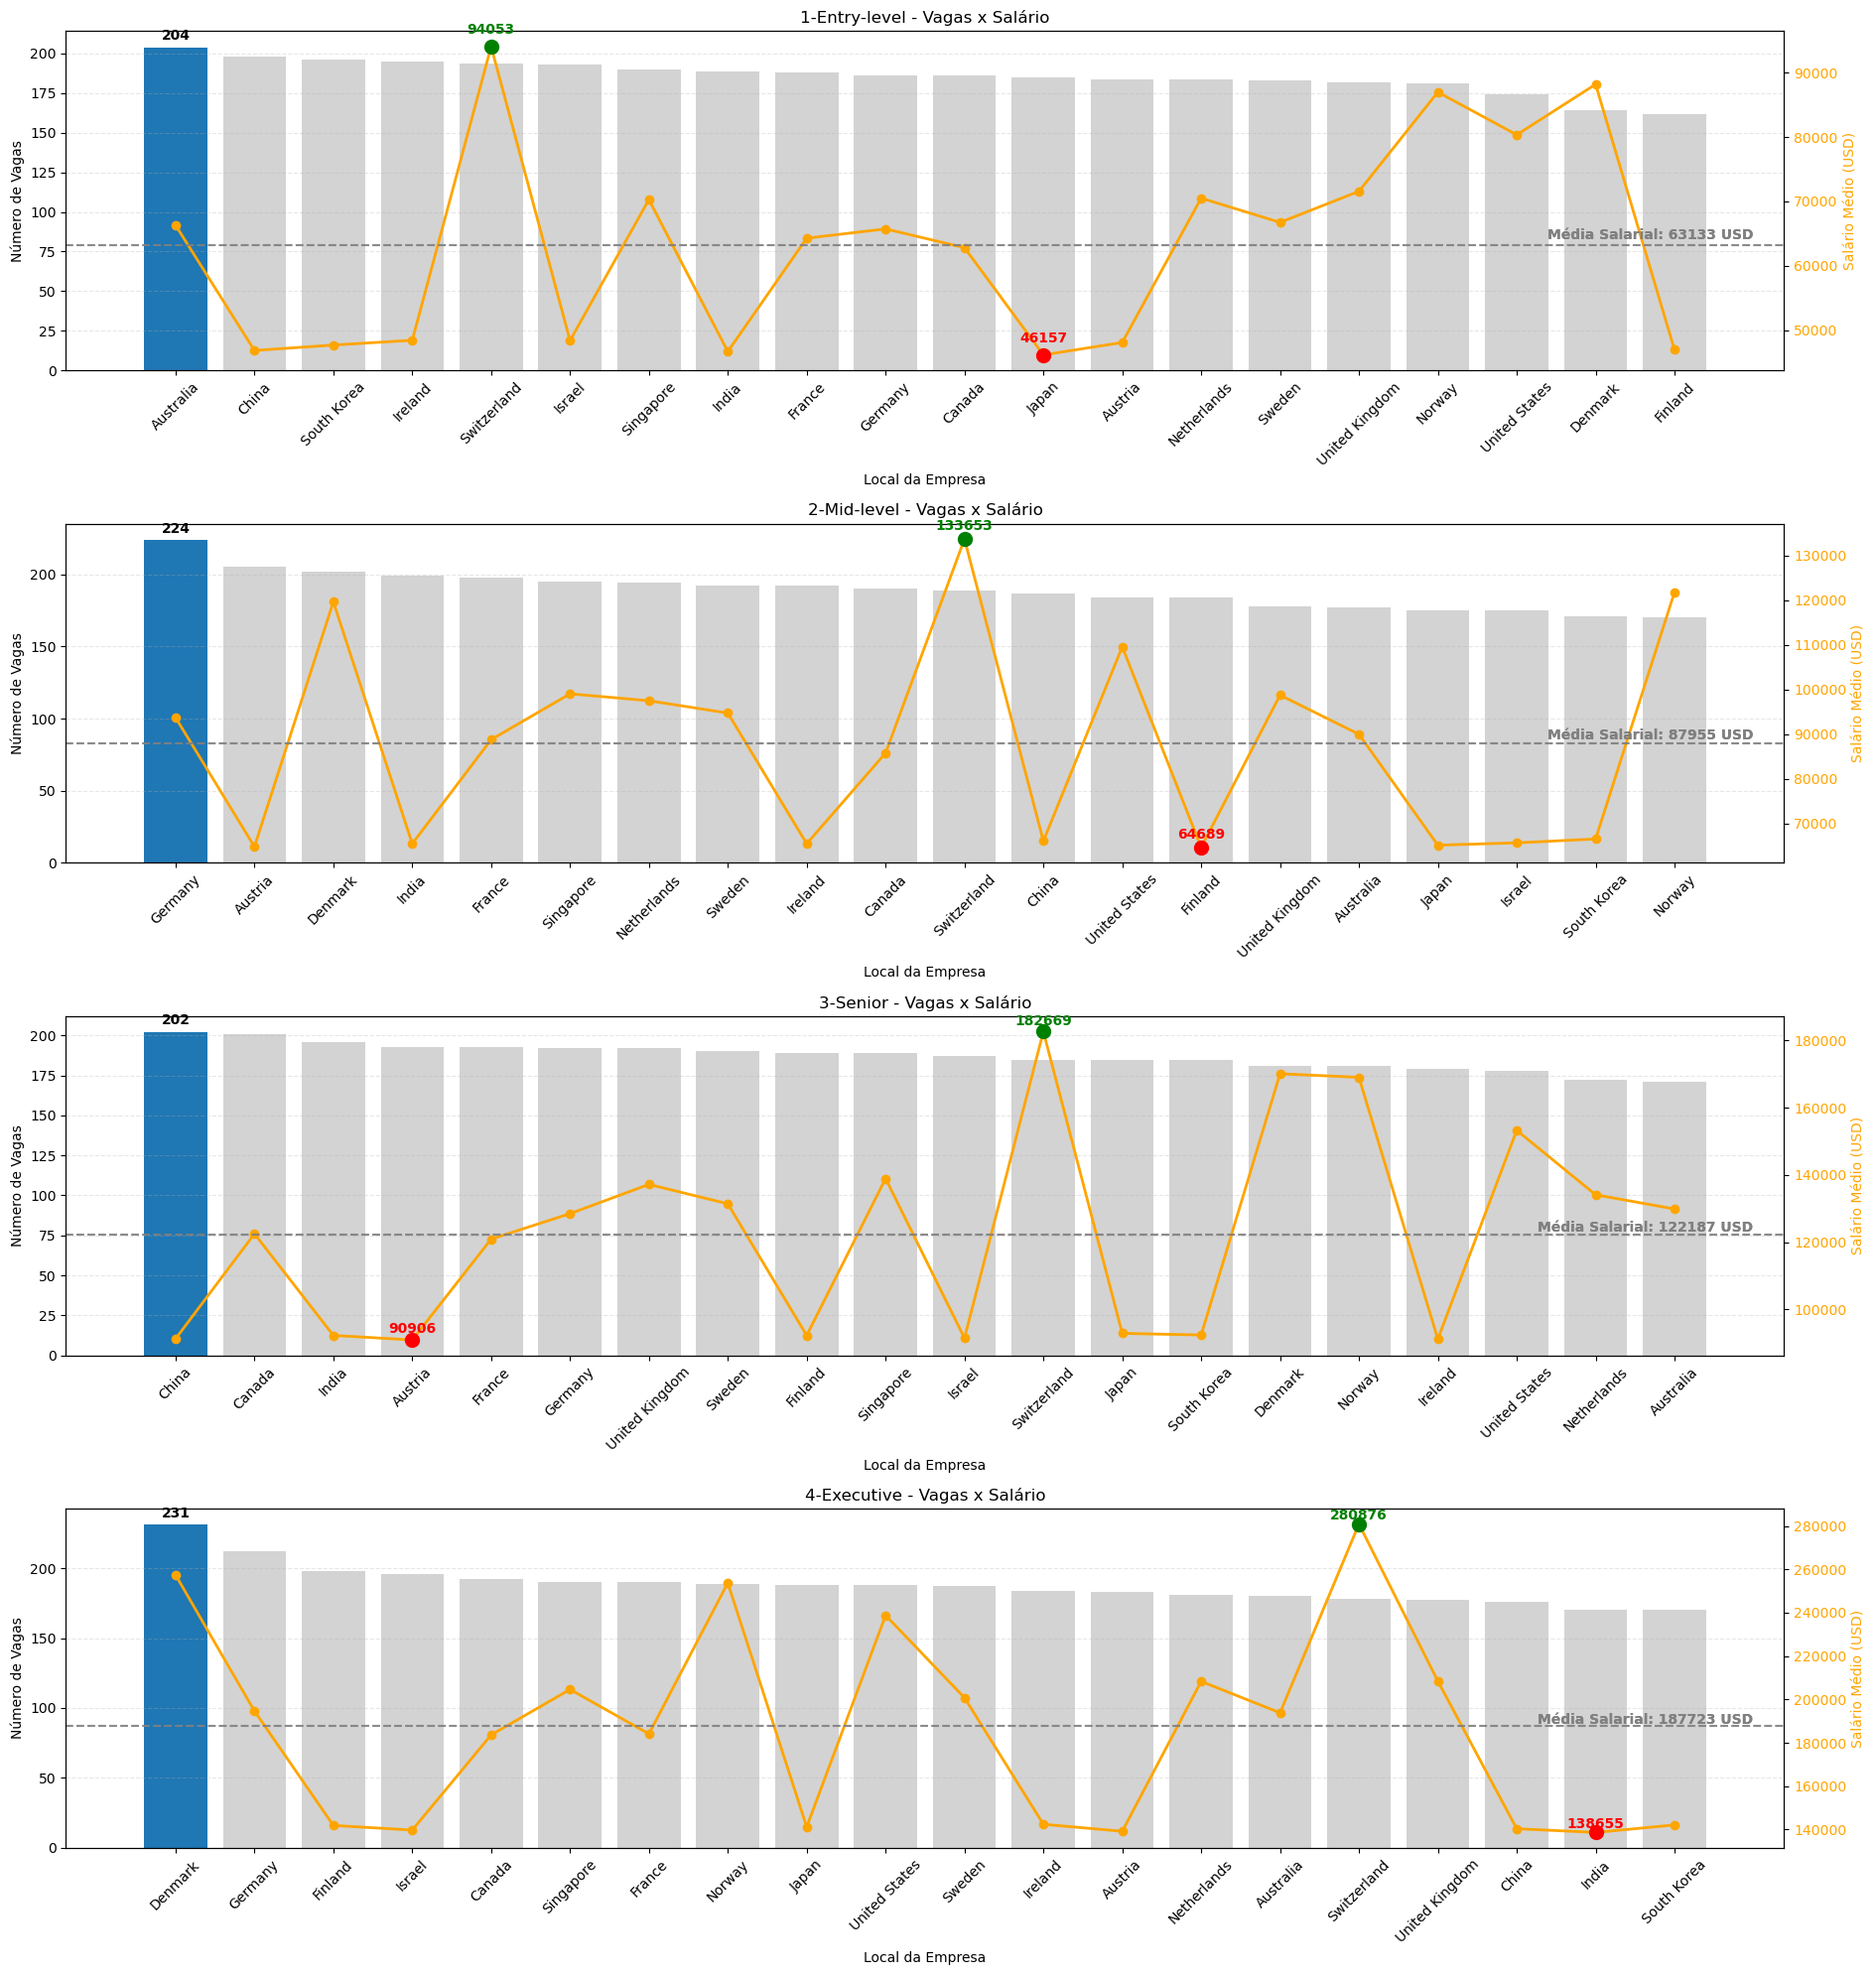

In [87]:
import matplotlib.pyplot as plt

df_excluidos = df
paises_excluir = ['Switzerland', 'Denmark', 'Norway']
# df_excluidos = df[~df['company_location'].isin(paises_excluir)]

# 1. Agrupar dados de vagas e salários
df_vagas_exp = (
    df_excluidos.groupby(['company_location', 'experience_level'])
    .size()
    .reset_index(name='qtd_vagas')
)

df_media_salario = (
    df_excluidos.groupby(['company_location', 'experience_level'])['salary_usd']
    .mean()
    .reset_index()
)

df_vagas_salarios = pd.merge(
    df_vagas_exp,
    df_media_salario,
    on=['company_location', 'experience_level'],
    how='inner'
)

# Lista dos níveis de experiência únicos (ordenados)
niveis_exp = sorted(df_vagas_salarios['experience_level'].unique())

# Criar figura 2x2
fig, axs = plt.subplots(4, 1, figsize=(19, 20))
axs = axs.flatten()

# Loop por nível de experiência
for i, nivel in enumerate(niveis_exp):
    df_nivel = df_vagas_salarios[df_vagas_salarios['experience_level'] == nivel].copy()

    # Ordenar pela quantidade de vagas (maior para menor)
    df_nivel = df_nivel.sort_values(by='qtd_vagas', ascending=False).reset_index(drop=True)
    
    # Identificar destaque
    idx_max_vagas = df_nivel['qtd_vagas'].idxmax()
    idx_max_sal = df_nivel['salary_usd'].idxmax()
    idx_min_sal = df_nivel['salary_usd'].idxmin()

    # Cores das barras
    cores_barras = ['#1f77b4' if idx == idx_max_vagas else 'lightgray' for idx in df_nivel.index]

    # Plotar barras
    ax1 = axs[i]
    barras = ax1.bar(df_nivel['company_location'], df_nivel['qtd_vagas'], color=cores_barras)
    ax1.set_ylabel('Número de Vagas')
    ax1.set_xlabel('Local da Empresa')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title(f"{nivel} - Vagas x Salário")
    ax1.grid(axis='y', linestyle='--', alpha=0.3)

    # Rótulo na barra com maior número de vagas
    for bar, idx in zip(barras, df_nivel.index):
        if idx == idx_max_vagas:
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3,
                     f"{df_nivel.loc[idx, 'qtd_vagas']}", ha='center', va='bottom', fontweight='bold')

    # Gráfico de linha - Salário
    ax2 = ax1.twinx()
    ax2.plot(df_nivel['company_location'], df_nivel['salary_usd'], color='orange', marker='o', linewidth=2)
    ax2.set_ylabel('Salário Médio (USD)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Destacar pico e vale
    for idx in [idx_max_sal, idx_min_sal]:
        cor = 'green' if idx == idx_max_sal else 'red'
        ax2.plot(df_nivel.loc[idx, 'company_location'], df_nivel.loc[idx, 'salary_usd'],
                 marker='o', color=cor, markersize=10)
        ax2.text(df_nivel.loc[idx, 'company_location'], df_nivel.loc[idx, 'salary_usd'] + 2000,
                 f"{int(df_nivel.loc[idx, 'salary_usd'])}", color=cor, ha='center', fontweight='bold')
        
        # Calcular média salarial do nível atual
        media_salarial = df_excluidos[df_excluidos['experience_level'] == nivel]['salary_usd'].mean()

        # Linha horizontal tracejada da média
        ax2.axhline(media_salarial, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
        ax2.text(
            x=len(df_nivel),
            y=media_salarial + 1000,
            s=f"Média Salarial: {int(media_salarial)} USD",
            color='gray',
            ha='right',
            fontweight='bold'
        )

plt.tight_layout()
plt.show()

***Resumo***

Parte das nossas Premissas/Hipóteses estavam corretas, quando indagamos que países como Suiça (Switzerland), Dinamarca(Denmark) teriam os melhores salários. Só erramos ao ter indicado a Suécia(Sweden), e não ter mencionado a Noruéga(Norway) como possibilidade.

Entretanto, com relação ao País que teriam mais vagas anunciadas, havíamos comentado sobre os EUA com mais numeros de vagas, mas em nenhum nível ele esteve presente.

Mesmo tendo os um dos salários mais atrativos, não é o que mais anuncia vagas

### 0️⃣3️⃣Quais são as principais habilidades técnicas exigidas?

✅ DataFrame de skills por 'job_title' gerado com sucesso.


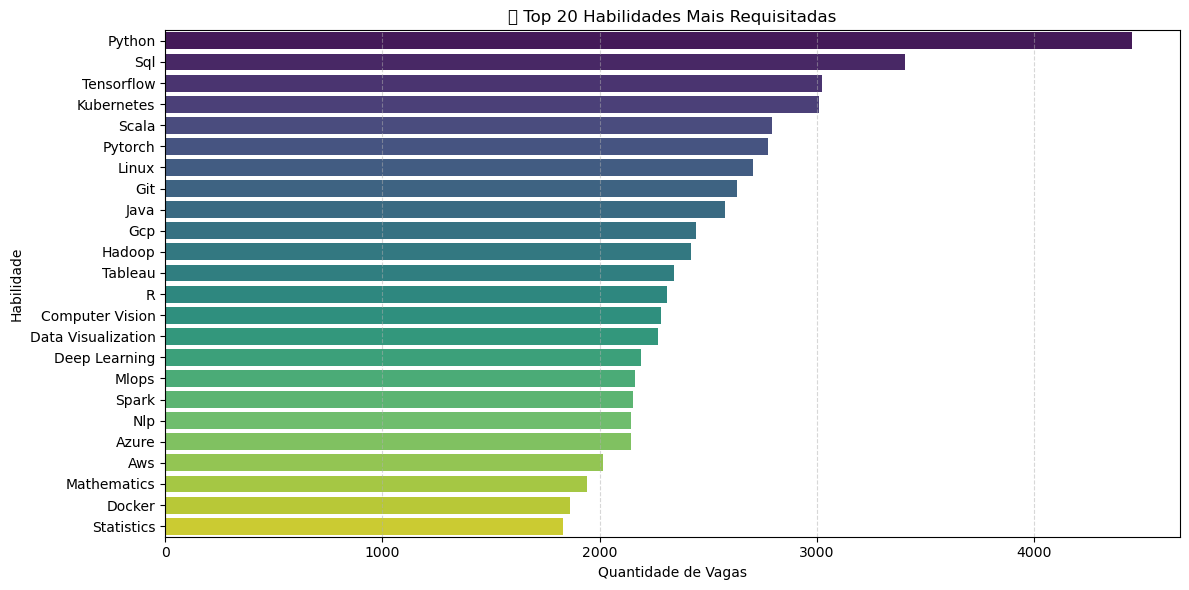

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar o DataFrame original
df_required = df_skills_job_title.gerar()

# Passo 1: Agrupar e somar a quantidade total por habilidade
df_required = (
    df_required
    .groupby('required_skill')['qtd']
    .sum()
    .reset_index()  # Isso transforma o índice em coluna novamente
    .sort_values(by='qtd', ascending=False)
)
# Passo 2: Gráfico de barras horizontal
plt.figure(figsize=(12, 6))
sns.barplot(data=df_required, y='required_skill', x='qtd', palette='viridis')
plt.title('💼 Top 20 Habilidades Mais Requisitadas')
plt.xlabel('Quantidade de Vagas')
plt.ylabel('Habilidade')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

✅ DataFrame de skills por 'job_title' gerado com sucesso.


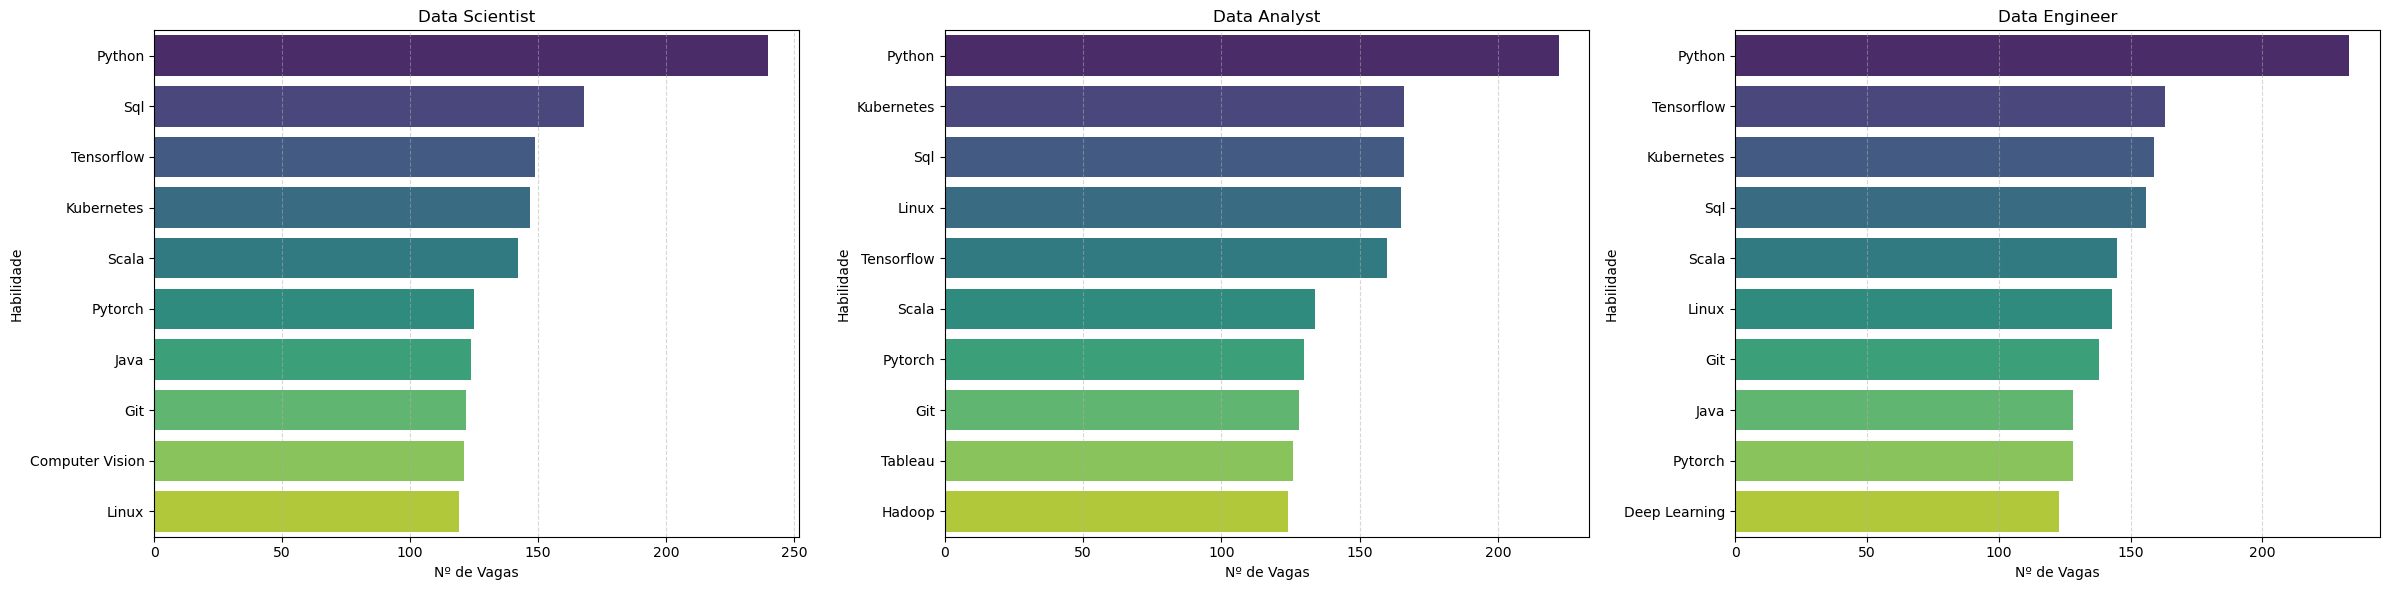

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Filtrar e agregar as habilidades por área
def preparar_top_habilidades(df, cargo, top_n=10):
    df_filtrado = df[df['job_title'] == cargo]
    df_agg = (
        df_filtrado
        .groupby('required_skill')['qtd']
        .sum()
        .reset_index()
        .sort_values(by='qtd', ascending=False)
        .head(top_n)
    )
    return df_agg

df_required = GeradorSkillsPorCategoria(df, 'job_title').gerar()

# Passo 2: Criar os três DataFrames
df_ds = preparar_top_habilidades(df_required, 'Data Scientist')
df_da = preparar_top_habilidades(df_required, 'Data Analyst')
df_de = preparar_top_habilidades(df_required, 'Data Engineer')

# Passo 3: Criar os gráficos lado a lado
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

def plotar(ax, df_plot, titulo):
    sns.barplot(data=df_plot, y='required_skill', x='qtd', palette='viridis', ax=ax)
    ax.set_title(titulo)
    ax.set_xlabel('Nº de Vagas')
    ax.set_ylabel('Habilidade')
    ax.grid(axis='x', linestyle='--', alpha=0.5)

# Plotar cada gráfico
plotar(axs[0], df_ds, 'Data Scientist')
plotar(axs[1], df_da, 'Data Analyst')
plotar(axs[2], df_de, 'Data Engineer')

plt.tight_layout()
plt.show()


In [93]:
#Filtrar todas as vagas de Engenheiro de Dados

total_vagas_DE = df[df['job_title'] == 'Data Engineer'].shape[0]

# Filtrar Data Engineer e que na required_skills tenha os textos 'AWS' ou 'Azure' ou 'GCP'

total_vagas_DE_com_Cloud = df[df['job_title'] == 'Data Engineer'].loc[df['required_skills'].str.contains('AWS|Azure|GCP')].shape[0]

print(r'Total de vagas de Engenheiro de Dados que demandam Cloud:', format(total_vagas_DE_com_Cloud / total_vagas_DE, '.2%'))

Total de vagas de Engenheiro de Dados que demandam Cloud: 36.85%


***Resumo***

Sem dúvidas, o **Python é a habilidade mais requisitada** entre todas as habilidades em geral do Mercado Global de IA.

Em contrapartida, habilidades como Matemática (Mathematics) e Estatistica (Statistics) não foram habilidades tão requisitadas, mostrando que o mercado está dando mais espaço para habilidades técnicas do que teóricas propriamente.

O que me surpreendeu, particularmente falando, foi ver que o Kubernetes tem mais espaço do que o Docker por exemplo.

Porém há um ponto que causa estranheza nesses dados. Olhando para as vagas de Engenharia de Dados, onde normalmente é indispensável ter conhecimentos de Cloud, me surpreende ter somente **36,85%** das vagas pedindo essa habilidade.

Então na minha interpretação:
- Ou os dados foram sintetizados/manipulados
- Ou então os recrutadores (como normalmente acontece aqui também) não souberam informar as habilidades corretas para aquela vaga específica, e então "poluiu" a análise